<a href="https://colab.research.google.com/github/ashutosh-vats01/ashutosh-vats01/blob/main/NLP_Amazon_Data_Preparation_prediction_deploy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## import all the necessary libraries
import warnings

#Ignoring unnecessory warnings
warnings.filterwarnings("ignore")                   

import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk    

In [11]:
##reading dataset
df = pd.read_csv('/content/Reviews.csv',error_bad_lines=False)

print(df.shape)
df.head()

(86989, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [12]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

### Data Preparation

In [13]:
### add some columns for upvote metrics
df['Helpful %'] = np.where(df['HelpfulnessDenominator'] > 0, df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'], -1)

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


#### assigning different different labels to helpful% according to its value

In [14]:
df['Helpful %'].unique()

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154,  0.57142857,  0.91489362,  0.86666667,  0.82352941,
        0.78571429,  0.74074074,  0.4       ,  0.375     ,  0.28571429,
        0.14285714,  0.77777778,  0.125     ,  0.9       ,  0.94117647,
        0.92307692,  0.7       ,  0.45454545,  0.88888889,  0.83870968,
        0.9047619 ,  0.92857143,  0.90909091,  0.91666667,  0.84615385,
        0.10526316,  0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,
        0.1       ,  0.18518519,  0.88      ,  0.69230769,  0.625     ,
        0.54545455,  0.41666667,  0.45833333,  0.22222222,  0.81818182,
        0.8125    ,  0.16666667,  0.93103448,  0.88235294,  0.23529412,
        0.63636364,  0.81481481,  0.95652174,  0.64285714,  0.58

In [15]:
pd.cut(df['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

0        80-100%
1            NaN
2        80-100%
3        80-100%
4            NaN
          ...   
86984    80-100%
86985    80-100%
86986    80-100%
86987    80-100%
86988    80-100%
Name: Helpful %, Length: 86989, dtype: category
Categories (6, object): ['Empty' < '0-20%' < '20-40%' < '40-60%' < '60-80%' < '80-100%']

In [16]:
df['%upvote'] = pd.cut( df['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

In [17]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [18]:
df.groupby(['Score', '%upvote']).agg('count')

Id  ProductId  UserId  ...  Summary   Text  Helpful %
Score %upvote                            ...                           
1     Empty     1236       1236    1236  ...     1236   1236       1236
      0-20%      392        392     392  ...      392    392        392
      20-40%     760        760     760  ...      760    760        760
      40-60%    1050       1050    1050  ...     1050   1050       1050
      60-80%     936        936     936  ...      936    936        936
      80-100%   1905       1905    1905  ...     1905   1905       1905
2     Empty      694        694     694  ...      694    694        694
      0-20%      122        122     122  ...      120    122        122
      20-40%     265        265     265  ...      265    265        265
      40-60%     478        478     478  ...      478    478        478
      60-80%     387        387     387  ...      387    387        387
      80-100%   1154       1154    1154  ...     1154   1154       1154
3     Empty      819        819     819  ...      819    819        819
      0-20%       68         68      68  ...       68     68         68
      20-40%     245        245     245  ...      245    245        245
      40-60%     533        533     533  ...      533    533        533
      60-80%     431        431     431  ...      431    431        431
      80-100%   1756       1756    1756  ...     1755   1755       1756
4     Empty      796        796     796  ...      796    796        796
      0-20%       19         19      19  ...       19     19         19
      20-40%     154        154     154  ...      154    154        154
      40-60%     494        494     494  ...      494    494        494
      60-80%     454        454     454  ...      454    454        454
      80-100%   4105       4105    4105  ...     4105   4105       4105
5     Empty     1888       1888    1888  ...     1888   1888       1888
      0-20%       66         66      66  ...       66     66         66
      20-40%     372        372     372  ...      372    372        372
      40-60%    1629       1629    1629  ...     1629   1629       1629
      60-80%    1669       1669    1669  ...     1669   1669       1669
      80-100%  20685      20685   20685  ...    20685  20685      20685

[30 rows x 10 columns]

#### considering only Id Column, as I have to count Total Upvotes for different different categories

In [ ]:
df.groupby(['Score', '%upvote']).agg({'Id':'count'})

Id
Score %upvote        
1     Empty      8060
      0-20%      2338
      20-40%     4649
      40-60%     6586
      60-80%     5838
      80-100%   12531
2     Empty      4234
      0-20%       762
      20-40%     1618
      40-60%     3051
      60-80%     2486
      80-100%    7014
3     Empty      5062
      0-20%       474
      20-40%     1506
      40-60%     3384
      60-80%     2754
      80-100%   11037
4     Empty      4780
      0-20%       116
      20-40%      909
      40-60%     3185
      60-80%     2941
      80-100%   26707
5     Empty     11638
      0-20%       432
      20-40%     2275
      40-60%    10312
      60-80%    11060
      80-100%  140661

In [20]:
df_s=df.groupby(['Score', '%upvote']).agg({'Id':'count'}).reset_index()
df_s

,Score,%upvote,Id
0,1,Empty,1236
1,1,0-20%,392
2,1,20-40%,760
3,1,40-60%,1050
4,1,60-80%,936
5,1,80-100%,1905
6,2,Empty,694
7,2,0-20%,122
8,2,20-40%,265
9,2,40-60%,478


#### create Pivot Table for better conclusion

In [21]:
df_s.pivot(index='%upvote',columns='Score')

Id                         
Score       1     2     3     4      5
%upvote                               
Empty    1236   694   819   796   1888
0-20%     392   122    68    19     66
20-40%    760   265   245   154    372
40-60%   1050   478   533   494   1629
60-80%    936   387   431   454   1669
80-100%  1905  1154  1756  4105  20685

#### create heatmap of it,for better Visualisations

Text(0.5, 1.0, 'How helpful users find among user scores')

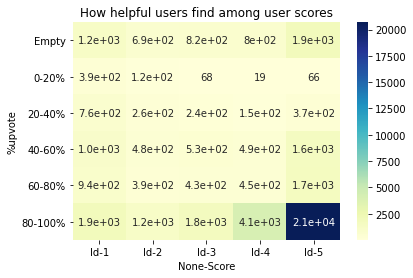

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_s.pivot(index='%upvote',columns='Score'),annot=True,cmap = 'YlGnBu')
plt.title('How helpful users find among user scores')

In [23]:
df.shape

(86989, 12)

In [24]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [25]:
df['Score'].unique()

array([5, 1, 4, 2, 3])

In [26]:
df2 = df[df['Score'] != 3]
X = df2['Text']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = df2['Score'].map(y_dict)

#### Score prediction

### convert your text into vectors using NLP

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')

In [28]:
##takes almost 2 mins to execute
X_c = c.fit_transform(X)

In [29]:
print('features: {}'.format(X_c.shape[1]))

features: 49943


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_c, y)
print(' train records: {}'.format(X_train.shape[0]))

 train records: 60005


In [32]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [34]:
ml =log.fit(X_train, y_train)
acc = ml.score(X_test, y_test)
print ('Model Accuracy: {}'.format(acc))

Model Accuracy: 0.9235076492350764


#### fetch Top 20 Positive & Top 20 negative words

In [35]:
w = c.get_feature_names()
w

['00',
 '000',
 '0000',
 '0003',
 '000iu',
 '000kwh',
 '000mg',
 '001',
 '002',
 '005',
 '0060721855',
 '0060928115',
 '007',
 '008',
 '0099',
 '00am',
 '00pm',
 '01',
 '010',
 '0100',
 '012',
 '0143114964',
 '0174',
 '02',
 '025913',
 '026220',
 '0273',
 '02jan2012',
 '03',
 '030',
 '0303',
 '030712',
 '0307460169',
 '0312377428',
 '031613290x',
 '0316735507',
 '032',
 '035',
 '03510',
 '0373892322',
 '03885',
 '0393070212',
 '03oz',
 '04',
 '042608460503',
 '044000025298',
 '04472700',
 '0472066978',
 '04820',
 '04830',
 '04mg',
 '05',
 '0520269926',
 '05715',
 '06',
 '062',
 '0625',
 '06254',
 '0679767959',
 '07',
 '07003',
 '070590080010',
 '0738551856',
 '0743246268',
 '0762426020',
 '07652',
 '0777',
 '08',
 '080',
 '0811845354',
 '08218118960519973573719117007586000668448380401921',
 '0825305845',
 '083',
 '0836194942',
 '084',
 '089',
 '0892817267',
 '08oz',
 '09',
 '090',
 '09244791666',
 '0939165422',
 '0939165562',
 '095',
 '0967089735',
 '0979201802',
 '0979780802',
 '09821

In [36]:
coef = ml.coef_.tolist()[0]
coef

[-0.5070195471986807,
 0.14598380628054766,
 0.03642398284519851,
 0.0022260421055722876,
 0.0,
 0.012098224598930979,
 -0.3145324345833465,
 0.00298337567580481,
 0.13038587464719814,
 -0.03756728436883474,
 0.00298337567580481,
 -0.07878259181389698,
 0.0,
 0.004115821602463196,
 -0.002245508313110845,
 -0.05739532428998497,
 -0.05454796765794918,
 -0.5489552107080774,
 0.0,
 0.008907620075951743,
 0.0,
 -0.00907186970676583,
 0.014818154289319646,
 0.06618090620043374,
 0.021437231406170237,
 0.0022486573193422903,
 0.01749307760985031,
 0.31427643356483465,
 -0.05435228268705664,
 0.0,
 -0.00330843305585189,
 -0.1252344350880232,
 0.0005861324421002755,
 0.00015858371916179786,
 0.0027334521186905833,
 0.0005386695262268569,
 0.004115821602463196,
 -0.03892369042692384,
 0.02377891766167226,
 -0.12051438403810494,
 -0.03632273784106874,
 0.09768983806913832,
 0.00037235281910076324,
 -0.5556914296461715,
 0.00014875049169950252,
 0.0,
 0.0,
 0.04415235100767563,
 0.0038200414981264

In [37]:
coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
coeff_df

,Word,Coefficient
0,00,-0.507020
1,000,0.145984
2,0000,0.036424
3,0003,0.002226
4,000iu,0.000000
...,...,...
49938,zz,0.010485
49939,zzzzzzzzzzz,0.140204
49940,çaykur,0.000000
49941,çelem,-0.092530


In [38]:
coeff_df = coeff_df.sort_values(['Coefficient', 'Word'],ascending=False)
coeff_df

,Word,Coefficient
49750,yummy,2.433675
39027,satisfied,2.155533
22891,hooked,2.130080
34204,pleasantly,2.063979
17543,excellent,2.044997
...,...,...
44531,terrible,-2.306582
4520,awful,-2.313547
14994,disappointing,-2.536713
49237,worst,-3.054233


In [39]:
print('-Top 20 positive-')
print(coeff_df.head(20).to_string(index=False))
print('\n')
print('-Top 20 negative-')        
print(coeff_df.tail(20).to_string(index=False))

-Top 20 positive-
       Word  Coefficient
      yummy     2.433675
  satisfied     2.155533
     hooked     2.130080
 pleasantly     2.063979
  excellent     2.044997
    amazing     2.004960
    perfect     1.971919
  delicious     1.913236
       beat     1.903093
      holds     1.861242
     corner     1.855975
   pedigree     1.841512
    awesome     1.831224
        yum     1.814654
    welcome     1.800490
   hesitant     1.772396
      coats     1.750320
    worried     1.703024
     highly     1.702574
    worries     1.687936


-Top 20 negative-
           Word  Coefficient
          sends    -1.843899
          hopes    -1.855341
   disappointed    -1.856209
           blah    -1.861621
          bland    -1.914144
      deceptive    -1.936888
       canceled    -1.937106
 disappointment    -1.965429
         ripoff    -1.989595
       horrible    -1.994857
          shame    -2.018925
      tasteless    -2.046835
    undrinkable    -2.048468
           died    -2.099407
  

#### lets try to create a function so that I can apply mutliple NLP Techniques + Multiple Ml algos in such a way that I will acheive my best accuracy

In [41]:
### create a function 

def text_fit(X, y, nlp_model,ml_model,coef_show=1):
    
    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    acc = ml.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = nlp_model.get_feature_names()
        coef = ml.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('\n')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('\n')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))
    
    


In [42]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression

In [43]:

text_fit(X, y, c, LogisticRegression())

features: 49943
 train records: 60005
 test records: 20002
Model Accuracy: 0.9244575542445755


-Top 20 positive-
         Word  Coefficient
       hooked     2.660144
   pleasantly     2.641730
      amazing     2.514707
     hesitant     2.410519
       corner     2.210597
    excellent     2.159811
      worried     2.131752
        penny     2.101200
    satisfied     2.100839
        yummy     2.041295
     downside     1.928606
         beat     1.891008
    delicious     1.885082
    wonderful     1.877928
      worries     1.877158
      perfect     1.849073
        holds     1.832788
 occasionally     1.805464
      awesome     1.787521
    fantastic     1.752625


-Top 20 negative-
           Word  Coefficient
       vinegary    -1.957756
         ripoff    -1.969789
          shame    -1.971508
          threw    -1.985049
    unappealing    -1.992260
        allegro    -1.996849
 disappointment    -2.009155
      tasteless    -2.065489
      deceptive    -2.098334
         

### Lets define a predict function

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score
def predict(X, y, nlp_model,ml_model):
    
    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    predictions=ml.predict(X_test)
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    acc=accuracy_score(predictions,y_test)
    print(acc)

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [46]:

predict(X,y,c,lr)

features: 49943
 train records: 60005
 test records: 20002
[[ 2284   539]
 [ 1001 16178]]
0.923007699230077


#### Accuracy is around 93.9% - not bad. However we notice that some of those significant coefficients are not meaningful, e.g. 280mg.

In [47]:
from sklearn.dummy import DummyClassifier

In [48]:
### calling function for dummy classifier 
text_fit(X, y, c, DummyClassifier(),0)

features: 49943
 train records: 60005
 test records: 20002
Model Accuracy: 0.7271772822717728


#### Logistic regression model on TFIDF

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

features: 49943
 train records: 60005
 test records: 20002
Model Accuracy: 0.9179582041795821


-Top 20 positive-
      Word  Coefficient
     great    10.809771
      best     8.180789
 delicious     7.934806
   perfect     7.149535
     loves     6.905707
 excellent     6.517315
      love     6.514147
      nice     6.156159
 wonderful     6.073276
      good     5.862372
    highly     5.297727
   amazing     5.240332
  favorite     5.078804
    smooth     4.537061
   awesome     4.533185
     yummy     4.490460
      easy     4.428393
   pleased     4.357874
     happy     4.112299
      glad     4.062741


-Top 20 negative-
           Word  Coefficient
          china    -4.156411
            bad    -4.234826
     disgusting    -4.251793
         hoping    -4.270844
          stale    -4.364863
        thought    -4.479134
          waste    -4.557514
          bland    -4.611687
          money    -4.633347
 disappointment    -4.770270
          threw    -4.913030
           wea

In [50]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
predict(X, y, tfidf, LogisticRegression())

features: 49943
 train records: 60005
 test records: 20002
[[ 1914   253]
 [ 1452 16383]]
0.9147585241475853


#### Upvote prediction

    We will be focusing on score 5 reviews, and get rid of comments with neutral votes

In [54]:
data = df[df['Score'] == 5]


In [52]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Helpful %', '%upvote'],
      dtype='object')

In [55]:
data2 = data[data['%upvote'].isin(['0-20%', '20-40%', '60-80%', '80-100%'])]
data2.shape

(22792, 12)

In [56]:
X = data2['Text']

In [57]:
y_dict = {'0-20%': 0, '20-40%': 0, '60-80%': 1, '80-100%': 1}
y = data2['%upvote'].map(y_dict)

In [ ]:
print(y.value_counts())

1.0    151721
0.0      2707
Name: %upvote, dtype: int64


#### The target class 'y' is highly skewed , we will observe positive upvotes are too much higher than negative ones.
    Let's resample the data to get balanced data:

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
tf=TfidfVectorizer()

In [60]:
X_c=tf.fit_transform(X)

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_c,y,train_size=0.7)

In [63]:
y_test.value_counts()

1.0    6707
0.0     131
Name: %upvote, dtype: int64

In [64]:
## RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler

In [ ]:
os =  RandomOverSampler()

In [ ]:
X_train_res, y_train_res = os.fit_sample(X_c, y)

In [ ]:
X_train_res.shape,y_train_res.shape

((303442, 67507), (303442,))

In [ ]:
from collections import Counter

In [ ]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({1.0: 151721, 0.0: 2707})
Resampled dataset shape Counter({1.0: 151721, 0.0: 151721})


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_class=LogisticRegression()

In [ ]:
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

In [ ]:

clf=GridSearchCV(estimator=log_class,param_grid=grid,cv=5,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train_res,y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [ ]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[  818     0]
 [  699 44812]]
0.9849122579809623
